# Underfit, Overfit and Regularization

In [5]:
def adj_r(r_sq, X, Y):
    adj_r1 = (1 - ((1 - r_sq)*(len(Y) - 1)) / (len(Y) - X.shape[1] - 1))
    return adj_r1

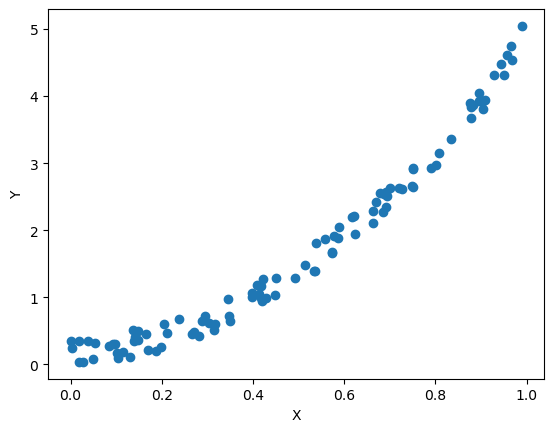

In [6]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.8*(X ** 12) + \
    0.2*(X ** 9) - \
    0.4*(X ** 5) - \
    2.1*(X ** 4) + \
    2.7*(X ** 3) + \
    3.5*(X ** 2) + \
    0.3 * X + \
    0.4 * np.random.rand(100,1)

fig = plt.figure()
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

from sklearn.model_selection import train_test_split

# Setting a specific value for random_state ensures that the data is split in the same way 
# each time you run the code, allowing for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

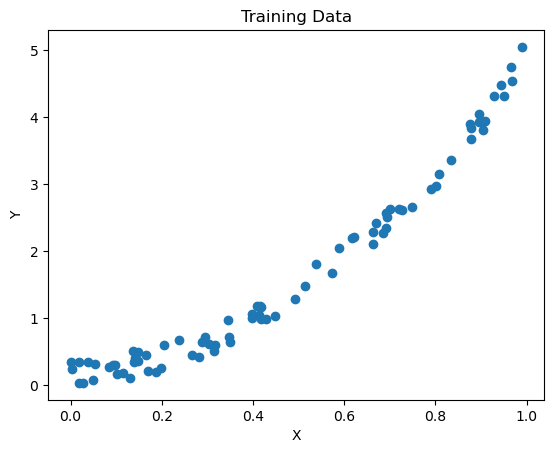

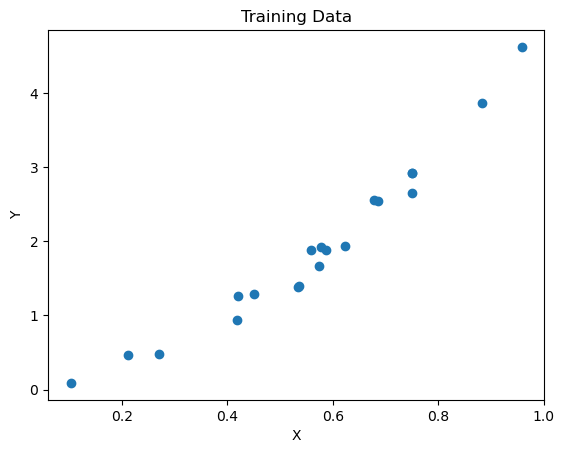

In [7]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data")
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degrees = 20
train_scores = []
test_scores = []

for degree in range(1,degrees):
    scaler = StandardScaler()
    polynomial = PolynomialFeatures(degree)
    
    # we're creating an object which will generate polynomial features, scale them 
    # and then pass it thru linear regression.
    polyreg_scaled_lr = make_pipeline(polynomial, scaler, LinearRegression())
    # To use the make_pipeline() function correctly and apply feature generation 
    # and scaling to your data, you need to provide the X_train and y_train datasets 
    # while calling the fit() method.
    
    # This line fits the polynomial regression model to the training data.
    polyreg_scaled_lr.fit(X_train, y_train)
    
    # These lines calculate the R-squared score of the fitted model on the 
    # training and test data, respectively.
    train_score = polyreg_scaled_lr.score(X_train, y_train)
    test_score = polyreg_scaled_lr.score(X_test, y_test)
    
    train_scores.append(adj_r(train_score, X_train, y_train))
    test_scores.append(adj_r(test_score, X_test, y_test))

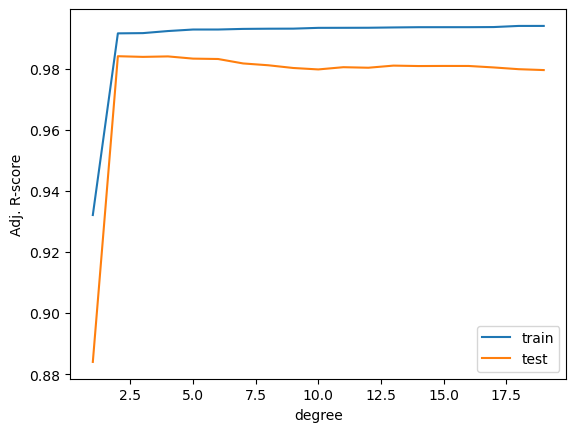

In [10]:
plt.figure()
plt.plot(list(range(1,degrees)), train_scores, label="train")
plt.plot(list(range(1,degrees)), test_scores, label="test")
plt.legend(loc="lower right")
plt.xlabel("degree")
plt.ylabel("Adj. R-score")
plt.show()

curve for training scores increases upto 2-3 degree and after that, it becomes stable.
<br>Performance for testing data is peaking at 2-3 degree and after that, it starts decreasing.

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/